### Implementing Adaline on the Iris data
##### By: Lance Dominic C. Raquel

#### 1. Import the following modules:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib  import cm
import sklearn.cluster as cluster
from sklearn import datasets

#### Part I – Importing the Dataset 

##### 1.) Import the Iris data by:

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

##### # 2. Show the last 5 rows of the data

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Part II - Select setosa and versicolor
##### 1. From the data set select setosa and versicolor. Print the data to see its values, e.g., print(df) where df contains the data.

In [4]:
df = df[(df[4] == 'Iris-setosa') | (df[4] == 'Iris-versicolor')]
(df)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


##### 2. To improve the gradient descent do a feature scaling. 

In [5]:
df[0] = (df[0] - df[0].mean()) / df[0].std()
df[2] = (df[2] - df[2].mean()) / df[2].std()

##### 3. Plot the scaled petal length vs. sepal length features and classify the data as setosa or versicolor. Use a blue x mark for versicolor and red solid circle for setosa.

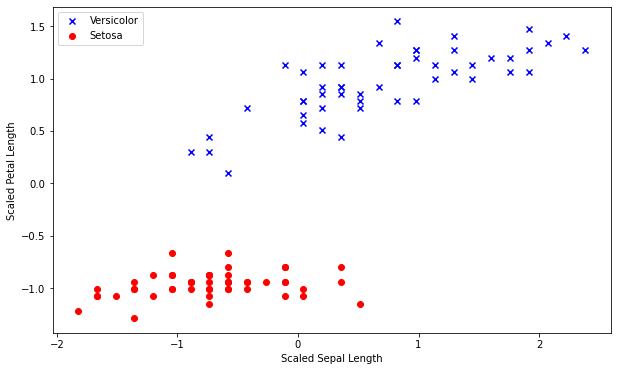

In [6]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df[0][df[4] == 'Iris-versicolor'], df[2][df[4] == 'Iris-versicolor'], marker='x', color='blue', label='Versicolor')
plt.scatter(df[0][df[4] == 'Iris-setosa'], df[2][df[4] == 'Iris-setosa'], marker='o', color='red', label='Setosa')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Petal Length')
plt.legend()
plt.show()

#### Part III - Implementation of Adaline
##### 1. Implement the Adaline algorithm to your data set with learning rate of 0.01.

In [7]:
class Adaline:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs = []

        for _ in range(self.n_epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.costs.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Prepare data
X = df.iloc[:, [0, 2]].values
y = np.where(df[4] == 'Iris-versicolor', 1, -1)

# Create and train Adaline
adaline = Adaline(learning_rate=0.01, n_epochs=20)
adaline.fit(X, y)

##### 2. Plot the mean squared deviation vs. epoch. Does the algorithm converge fast? How many epochs was executed?

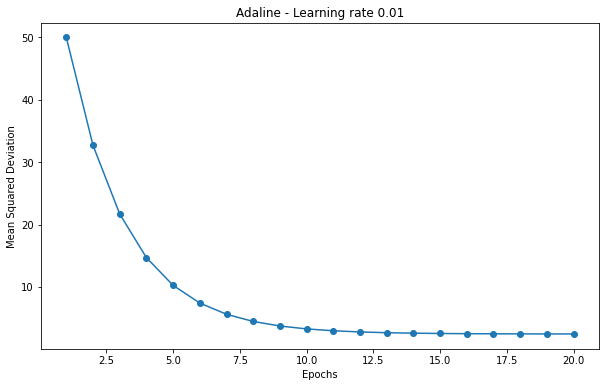

Number of epochs executed: 20


In [8]:
fig = plt.figure(figsize=(10,6))
plt.plot(range(1, len(adaline.costs) + 1), adaline.costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Deviation')
plt.title('Adaline - Learning rate 0.01')
plt.show()
print("Number of epochs executed:", len(adaline.costs))

##### 3. Classify the data set into two groups: Setosa and Versicolor, where now the output is the predicted output in the Adaline algorithm. Note you must use the Threshold function (Unit step function) so that the output will have only two possible values.

In [9]:
def threshold(x):
    return np.where(x >= 0, 1, -1)
predicted_output = adaline.predict(X)
predicted_output = threshold(predicted_output)
results_df = pd.DataFrame({'Sepal Length (scaled)': X[:, 0],
                           'Petal Length (scaled)': X[:, 1],
                           'Predicted Output': predicted_output,
                           'Actual Class': np.where(df[4] == 'Iris-versicolor', 1, -1)})
(results_df)

,Sepal Length (scaled),Petal Length (scaled),Predicted Output,Actual Class
0,-0.578153,-1.009275,-1,-1
1,-0.889826,-1.009275,-1,-1
2,-1.201499,-1.078309,-1,-1
3,-1.357336,-0.940241,-1,-1
4,-0.733990,-1.009275,-1,-1
...,...,...,...,...
95,0.356865,0.923673,1,1
96,0.356865,0.923673,1,1
97,1.136048,0.992707,1,1
98,-0.578153,0.095267,1,1


##### 4. Plot the clustered data set using a 2D-colormap graph in python where the color indicates the predicted output and the x- and y-axes are the features. 

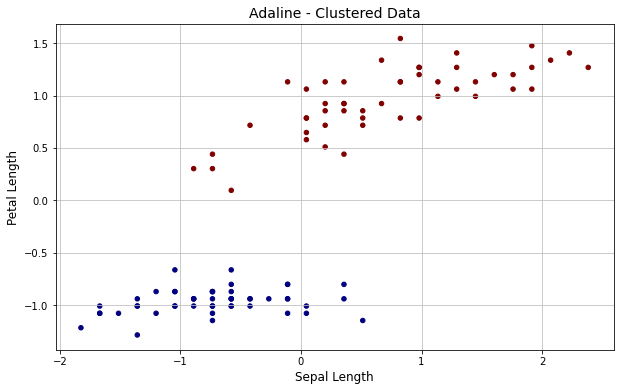

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title("Adaline - Clustered Data",fontsize=14)
ax.set_xlabel("Sepal Length",fontsize=12)
ax.set_ylabel("Petal Length",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
X = df[0]
y = df[2]
z = predicted_output

# scatter with colormap mapping to z value
ax.scatter(X,y,s=20,c=z, marker = 'o', cmap = cm.jet );

plt.show()